<a href="https://colab.research.google.com/github/joshuareyesc/MetNumUN2023I/blob/main/Lab10/pperezsAlgorithmicToolboxWeek3SolvingNonLinearAlgebraicEquations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [ ]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    # ... ENTER YOUR CODE HERE ...
    x = x0
    niter = 0
    while abs(f(x)) > eps and niter < maxiter:
        x = x - f(x) / fder(x)
        niter += 1
    return x, niter

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...
def f(x):
    return x**2-1
def fder(x):
    return 2*x
root, iterations = newton_iteration(f, fder, 2)
print("Root:", root)
print("Number of iterations:", iterations)

Root: 1.0000000464611474
Number of iterations: 4


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...
def modified_newton_iteration(f, fder, x0, m, eps=1e-5, maxiter=1000):
    """Find a root of f(x) = 0 via modified Newton's iteration starting from x0."""
    x = x0
    niter = 0

    while abs(f(x)) > eps and niter < maxiter:
        x = x - m * f(x) / fder(x)
        niter += 1

    return x, niter
def f(x):
    return (x**2 - 1)**2

def fder(x):
    return 4 * x * (x**2 - 1)

m_values = [1, 2, 3, 4, 5]
x0 = 2
eps = 1e-5

for m in m_values:
    root, iterations = modified_newton_iteration(f, fder, x0, m, eps)
    print(f"m = {m}:")
    print("Root:", root)
    print("Number of iterations:", iterations)

m = 1:
Root: 1.0010012015801961
Number of iterations: 11
m = 2:
Root: 1.0003048780487804
Number of iterations: 3
m = 3:
Root: 1.0010974946943958
Number of iterations: 8
m = 4:
Root: 2.0
Number of iterations: 1000
m = 5:
Root: 0.9998036001139949
Number of iterations: 681


# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

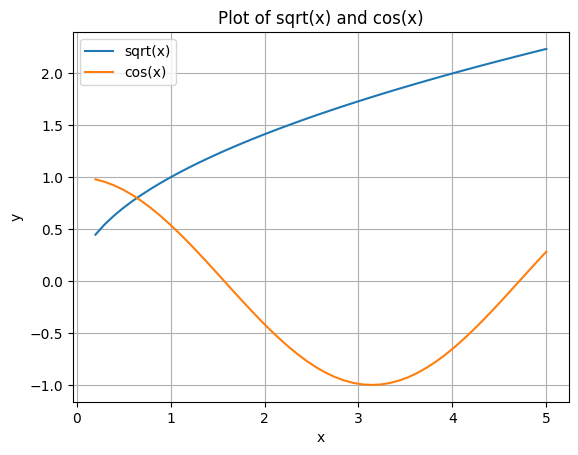

In [4]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0.2, 5, 50)
def plot_equation():
    
    y1 = np.sqrt(x)
    y2 = np.cos(x)
    plt.plot(x, y1, label='sqrt(x)')
    plt.plot(x, y2, label='cos(x)')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Plot of sqrt(x) and cos(x)')
    plt.grid(True)
    plt.show()



# Plotting the equation
plot_equation()




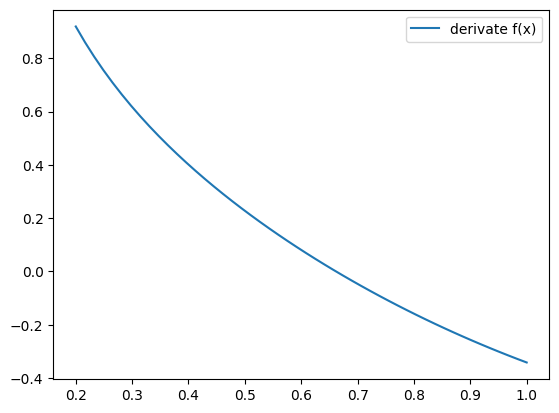

In [ ]:
x = np.linspace(0.2, 1, 50)
plt.plot(x,((1/(2*((np.sqrt(x)))))-np.sin(x)))
plt.legend(labels=["derivate f(x)"])
plt.show()

In [ ]:
def newton_iteration_fixed_poinit(x0, alpha, eps=1e-5, max=1000):
    fun = x0 - alpha *(np.sqrt(x0) - np.cos(x0))
    cont = 0
    
    while (abs(fun - x0) > eps): 
        x0 = fun
        fun = x0 - alpha * (np.sqrt(x0) - np.cos(x0))
        cont += 1 
        
        if cont > max: 
            fun = 'Nan'
            break
    
    return fun, cont

In [ ]:
x0 = 2 / 3

for i in [0.1, 0.5, 1, 1.5]: 
    ans, cont = newton_iteration_fixed_poinit( x0, i)
    print(i,',', ans,',', cont)
  

0.1 , 0.6417846268333629 , 44
0.5 , 0.6417193751949732 , 8
1 , 0.6417136823927276 , 6
1.5 , 0.6417185143046147 , 47


# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

In [5]:
import cmath

def newton_frac(x0):
    
    Eps=1e-5
    Maxiter=1000
    NX = x0 - (x0**3-1)/3*x0**2
    Cont = x0
    
    for _ in range(Maxiter):
        if(abs(NX-Cont)<=Eps):
            break
        if(abs(NX-Cont)>1e2):
            return 0
        Cont = NX
        NX = NX - (NX**3-1)/3*NX**2
        
    if abs(NX-cmath.exp(complex(0,2*np.pi*1/3)))<abs(NX-cmath.exp(complex(0,2*np.pi*2/3))):
        return 1
    else :
        return 2

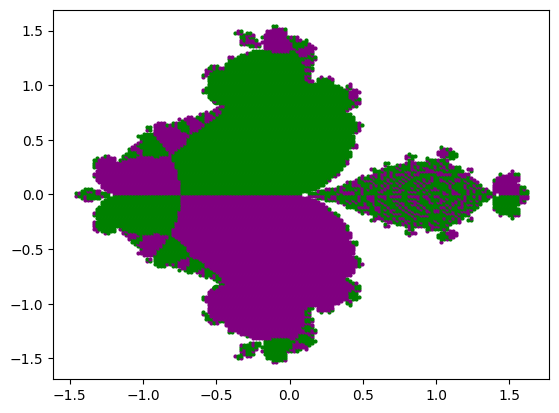

In [6]:
import numpy as np
x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)

for x0 in x:
    for y0 in y:
        fr = newton_frac(complex(x0,y0))
        if fr==1:
            plt.plot(x0, y0, marker='o', markersize=2, color='green')
        elif fr==2:
            plt.plot(x0, y0, marker='o', markersize=2, color='purple')
        
roots_x = []
roots_y = []
for i in range(3):
    z = cmath.exp(complex(0,2*np.pi*i/3))
    roots_x.append(z.real)
    roots_y.append(z.imag)

plt.scatter(roots_x, roots_y, c='g')
plt.show()